In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [ ]:
data = sns.load_dataset(name='iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Q1

In [ ]:
attributes = data.columns[:-1]
for attribute in attributes:
  col = np.array(data.loc[:,attribute])
  mean = np.sum(col)/len(col)
  variance = np.sum((col-mean)**2)/(len(col)-1)
  print(f'Attribute: {attribute}\n\tMean:\t  {mean}\n\tVaraince: {variance}')

Attribute: sepal_length
	Mean:	  5.843333333333334
	Varaince: 0.6856935123042507
Attribute: sepal_width
	Mean:	  3.0573333333333337
	Varaince: 0.189979418344519
Attribute: petal_length
	Mean:	  3.7580000000000005
	Varaince: 3.116277852348993
Attribute: petal_width
	Mean:	  1.1993333333333336
	Varaince: 0.5810062639821029


### Helper Code [For Q2,Q3]

In [ ]:
attribute_pairs = [
                   ['sepal_length', 'sepal_width'],
                   ['sepal_length', 'petal_length'],
                   ['sepal_length', 'petal_width'],
                   ['sepal_width', 'petal_length'],
                   ['sepal_width', 'petal_width'],
                   ['petal_length', 'petal_width']
]

def bubble(ls):
  for i in range(len(ls)):
    for j in range(len(ls)):
      if ls[i][0] > ls[j][0]:
        ls[i],ls[j] = ls[j],ls[i]

def get_corcoef_values(species):
  corcoef_vals = []
  plt.figure(figsize=(12,8))
  index = 1
  for a1,a2 in attribute_pairs:
    if species == 'all':
      c1 = np.array(data.loc[:,a1])
      c2 = np.array(data.loc[:,a2])
    else:
      c1 = np.array(data[data['species']==species].loc[:,a1])
      c2 = np.array(data[data['species']==species].loc[:,a2])
    m1 = np.sum(c1)/len(c1)
    m2 = np.sum(c2)/len(c2)
    v1 = np.sum((c1-m1)**2)/(len(c1)-1)
    v2= np.sum((c2-m2)**2)/(len(c2)-1)
    cov = np.sum((c1-m1)*(c2-m2))/(len(c1)-1)
    cor = cov/(np.sqrt(v1)*np.sqrt(v2))
    corcoef_vals.append(
        [cor,[a1,a2]]
    )
    plt.subplot(2,3,index)
    plt.scatter(c1,c2)
    plt.xlabel(a1)
    plt.ylabel(a2)
    plt.title(f'{a2} vs. {a1}')
    index+=1

  plt.suptitle(f'{species} species')
  plt.tight_layout()

  bubble(corcoef_vals)
  print(f'Correlation coefficients for any two attributes of {species} species are:\n')
  for i in corcoef_vals:
    print(f'\t{i[1][0]} and {i[1][1]}: {np.round(i[0],10)}')
  print()
  plt.show()

### Q2

Correlation coefficients for any two attributes of all species are:

	petal_length and petal_width: 0.9628654314
	sepal_length and petal_length: 0.8717537759
	sepal_length and petal_width: 0.8179411263
	sepal_length and sepal_width: -0.1175697841
	sepal_width and petal_width: -0.3661259325
	sepal_width and petal_length: -0.4284401043



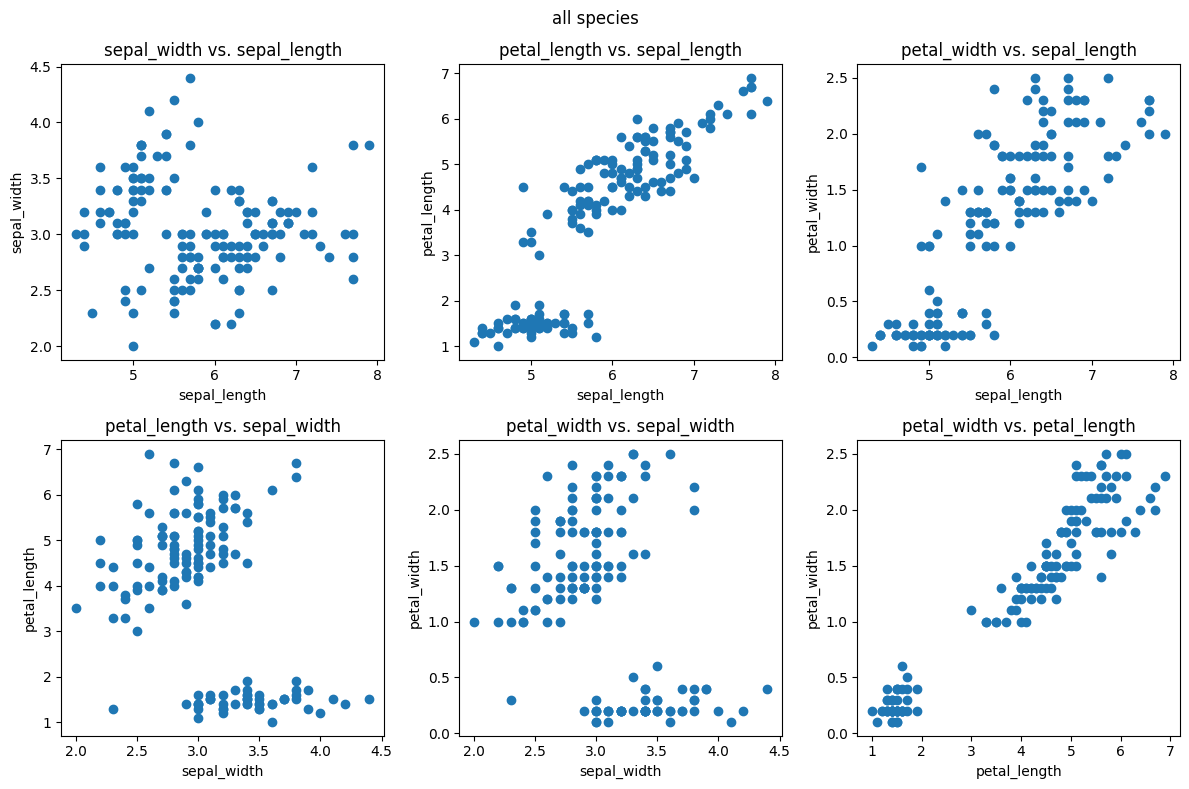

In [ ]:
get_corcoef_values('all')

### Q3

Correlation coefficients for any two attributes of setosa species are:

	sepal_length and sepal_width: 0.7425466857
	petal_length and petal_width: 0.3316300408
	sepal_length and petal_width: 0.2780983529
	sepal_length and petal_length: 0.2671757589
	sepal_width and petal_width: 0.2327520114
	sepal_width and petal_length: 0.1776999668



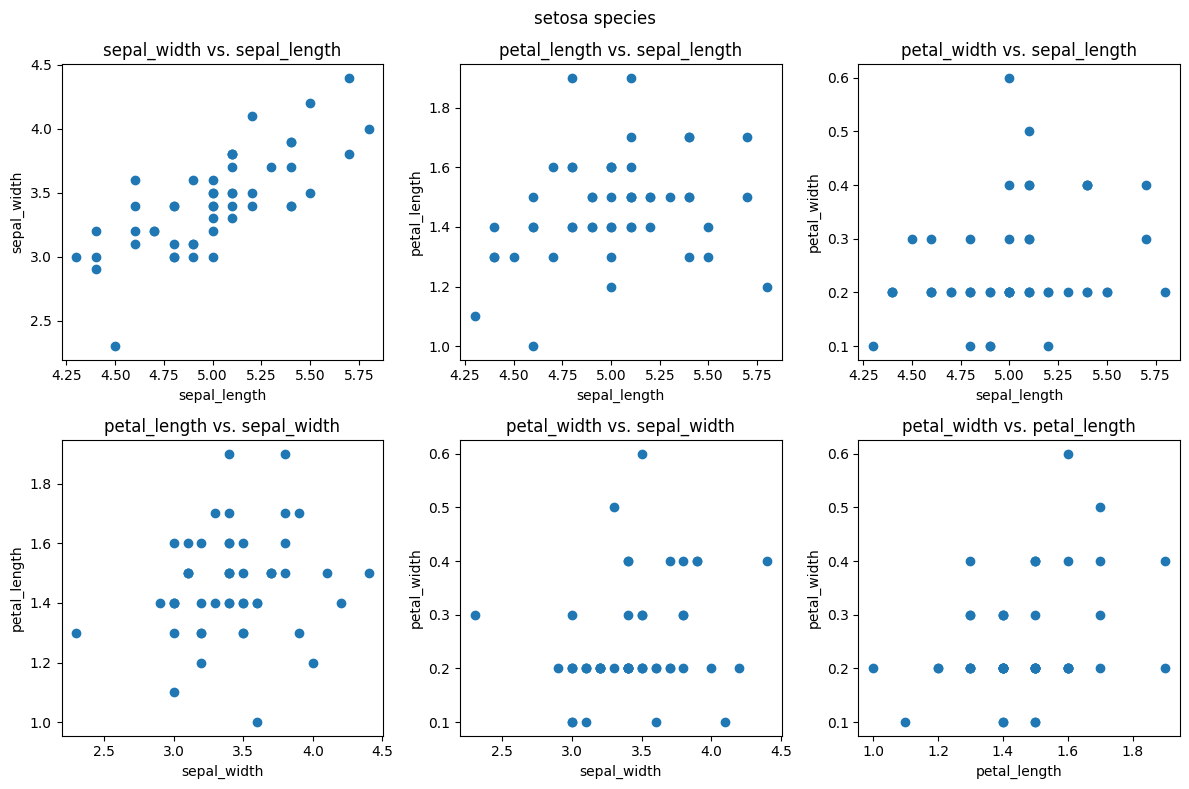

In [ ]:
get_corcoef_values('setosa')

Correlation coefficients for any two attributes of versicolor species are:

	petal_length and petal_width: 0.7866680885
	sepal_length and petal_length: 0.7540489586
	sepal_width and petal_width: 0.66399872
	sepal_width and petal_length: 0.5605220917
	sepal_length and petal_width: 0.5464610716
	sepal_length and sepal_width: 0.5259107173



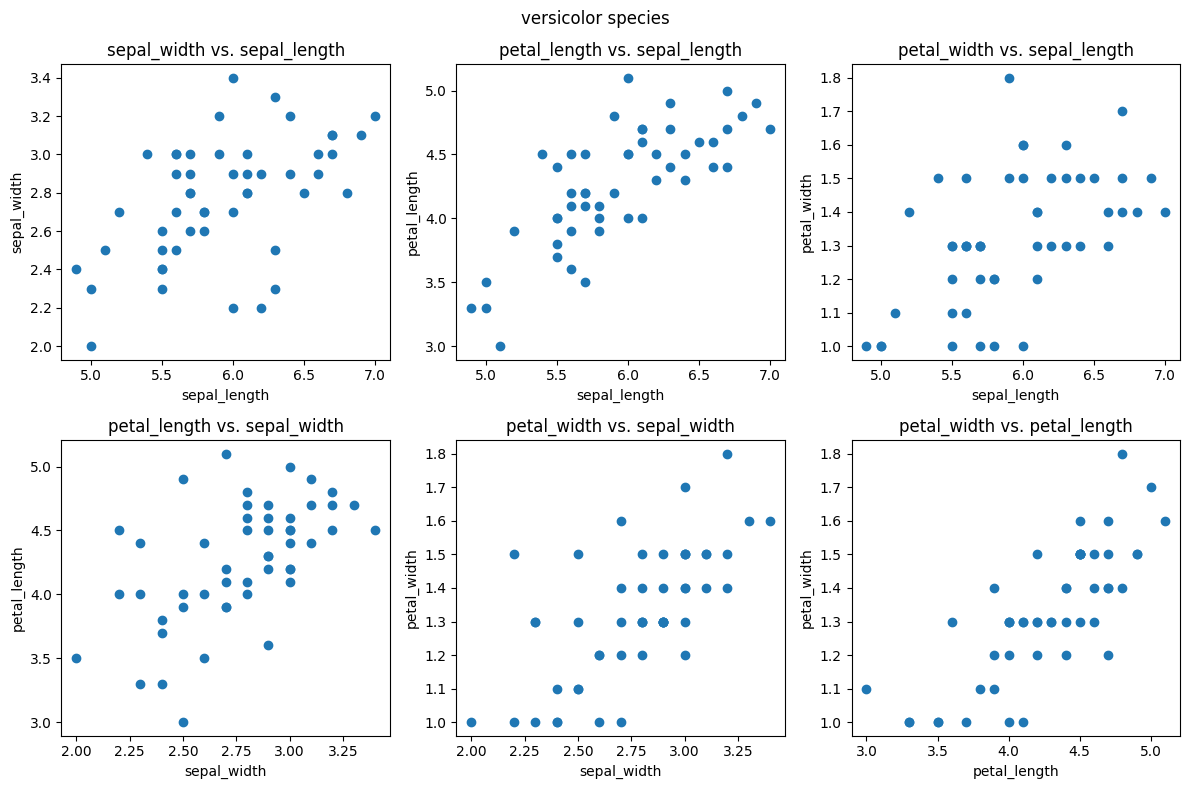

In [ ]:
get_corcoef_values('versicolor')

Correlation coefficients for any two attributes of virginica species are:

	sepal_length and petal_length: 0.8642247329
	sepal_width and petal_width: 0.5377280263
	sepal_length and sepal_width: 0.4572278164
	sepal_width and petal_length: 0.4010445773
	petal_length and petal_width: 0.3221082159
	sepal_length and petal_width: 0.2811077092



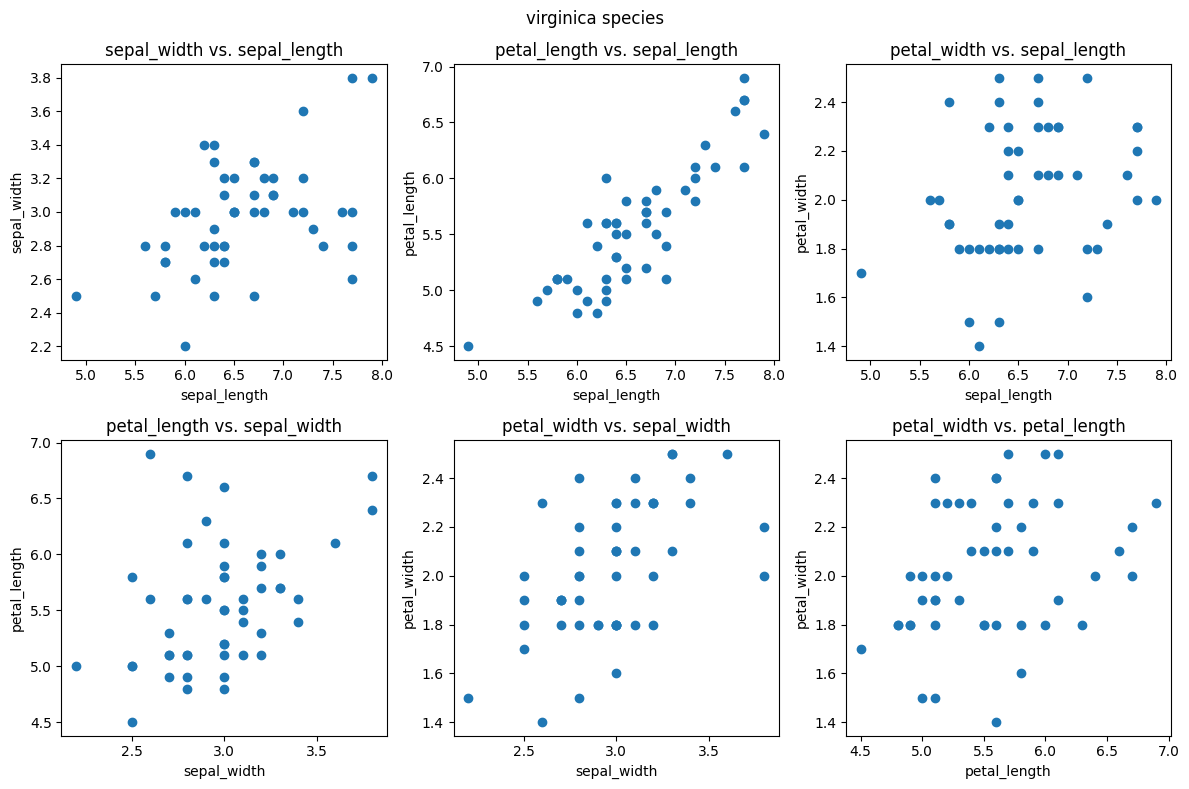

In [ ]:
get_corcoef_values('virginica')

### References
Discussed with Jaskirat Singh Maskeen (23110146)